# Goal

Load some data and look at a few predictions from the classifier

In [2]:
# loading the data
from knowledge_extraction.data import ColoredMNIST

mnist = ColoredMNIST("extras/data", download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:06<00:00, 1498017.02it/s]


Extracting extras/data/ColoredMNIST/raw/train-images-idx3-ubyte.gz to extras/data/ColoredMNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 966441.37it/s]


Extracting extras/data/ColoredMNIST/raw/train-labels-idx1-ubyte.gz to extras/data/ColoredMNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 1769737.88it/s]


Extracting extras/data/ColoredMNIST/raw/t10k-images-idx3-ubyte.gz to extras/data/ColoredMNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2668515.03it/s]

Extracting extras/data/ColoredMNIST/raw/t10k-labels-idx1-ubyte.gz to extras/data/ColoredMNIST/raw



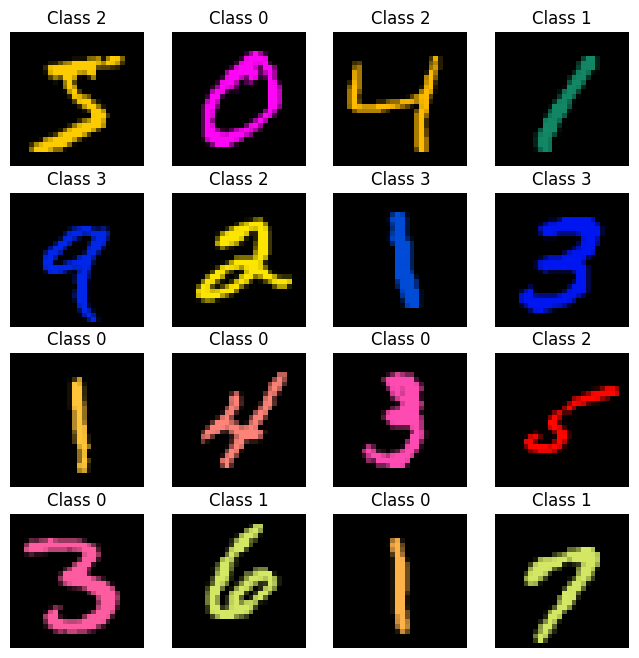

In [3]:
import matplotlib.pyplot as plt

# Show some examples
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axs.flatten()):
    x, y = mnist[i]
    x = x.permute((1, 2, 0))  # make channels last
    ax.imshow(x)
    ax.set_title(f"Class {y}")
    ax.axis("off")

In [5]:
import torch
from knowledge_extraction.model import DenseModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Load the model
model = DenseModel(input_shape=(3, 28, 28), num_classes=4)
# Load the checkpoint
checkpoint = torch.load("../checkpoints/model.pth")
model.load_state_dict(checkpoint)
model = model.to(device)

/var/folders/bd/bn434f8n1bsdd8y0yby_fv7r0000gn/T/ipykernel_86968/4018440823.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("../checkpoints/mode

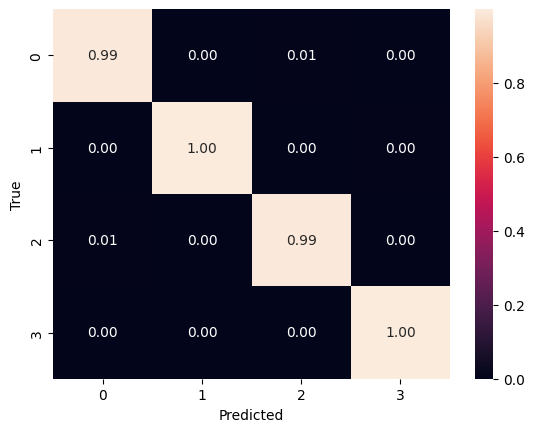

In [9]:
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_mnist = ColoredMNIST("../data", download=True, train=False)
dataloader = DataLoader(test_mnist, batch_size=32, shuffle=False)

labels = []
predictions = []
for x, y in dataloader:
    pred = model(x.to(device))
    labels.extend(y.cpu().numpy())
    predictions.extend(pred.argmax(dim=1).cpu().numpy())

cm = confusion_matrix(labels, predictions, normalize="true")
sns.heatmap(cm, annot=True, fmt=".2f")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()